In [3]:
# ----------------------------------------------------------------------------
# Title: Assignment 6.2
# Author: Surenther Selvaraj
# Date: 19 Oct 2025
# Modified By: Surenther Selvaraj
# Description: Term Project Milestone 1: Data Selection and EDA
# Data: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
# ----------------------------------------------------------------------------

In [4]:
# --- Importing Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Project Narrative: Business Problem and Model Target

The original business problem is now refocused on optimizing marketing spend for a consumer retail company whose data is provided in the Kaggle Customer Personality Analysis Dataset. The company frequently runs direct marketing campaigns (e.g., promotional emails, mailers, or catalog offers) but faces two main challenges: a low overall campaign acceptance rate and high associated mailing/contact costs. This leads to inefficient resource allocation and poor Return on Investment (ROI) for marketing efforts.

The core problem is the lack of a predictive targeting model to filter the customer base and identify which individuals are most likely to accept the new offer before the campaign is launched. Currently, campaigns are deployed broadly, wasting resources on customers who are unlikely to convert.

The business solution is to build a classification model that calculates a propensity-to-purchase score for each customer. This score will allow the marketing team to target only the top 10% or 20% of customers most likely to respond, drastically lowering the contact volume while maintaining or even increasing the absolute number of campaign acceptances, thereby maximizing ROI.

The Target for the Model:
The model's target variable will be Response, a binary outcome (1 = Accepted the last campaign offer, 0 = Did not accept). This is a classic classification problem. The final model will predict $P(\text{Response}=1)$ using customer demographics, past spending habits, and previous campaign success metrics. This real-world application provides a tangible business benefit by directly improving marketing efficiency.

## Data Selection and Initial EDA

### Data Source
The analysis uses a real-world dataset sourced from Kaggle: Customer Personality Analysis. This dataset contains information on customer demographics, product spending (e.g., on wines, fruits, meat), and prior marketing campaign responses for a retail company.

### Key Variables
| Variable  | Type  |  Description |
|---|---|---|
| Income  | Numerical  | Customer's yearly household income.  |
| Recency  | Numerical  | Number of days since the customer’s last purchase (low = high engagement).  |
| MntWines   | Numerical  | Amount spent on wine in the last 2 years (a proxy for total high-value spending).   |
| Education  | Categorical  | Customer's education level (e.g., Graduation, PhD, Master).   |
| NumWebPurchases  | Numerical  | Number of purchases made through the company's website.   |
| Response  | Binary (Target)  | 1 if the customer accepted the last campaign offer, 0 otherwise.  |

In [5]:
# --- Load and Prepare Data ---
try:
    df = pd.read_csv('marketing_campaign.csv', sep='\t')
except FileNotFoundError:
    print("Error: marketing_campaign.csv not found. Please ensure the file is in the correct directory.")
    exit()

# Handle Missing Income values
# Dropping NaNs for initial modeling simplicity, though imputation could be an option later.
df.dropna(subset=['Income'], inplace=True)

# Calculate Age
current_year = 2025
df['Age'] = current_year - df['Year_Birth']

# Calculate Total Spending for future feature use
df['Total_Mnt'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + \
                  df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Set Matplotlib style for better visuals
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

### Graph 1: Distribution of the Target Variable (Response Rate)
Description: This bar chart displays the overall proportion of customers who accepted the last campaign offer versus those who did not.

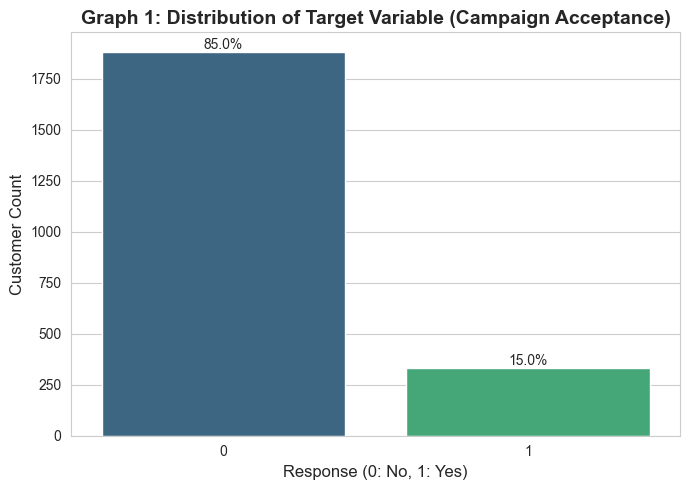

In [6]:
# --- Graph 1: Distribution of the Target Variable (Response Rate) ---
plt.figure(figsize=(7, 5))
ax1 = sns.countplot(x='Response', data=df, palette='viridis')
ax1.set_title('Graph 1: Distribution of Target Variable (Campaign Acceptance)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Response (0: No, 1: Yes)', fontsize=12)
ax1.set_ylabel('Customer Count', fontsize=12)
total = len(df)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax1.annotate(percentage, (x, y), ha='center', va='bottom')
plt.tight_layout()
plt.show()

Analysis: <br> This bar chart visualizes the class distribution of the target variable, Campaign Acceptance (Response), clearly highlighting a severe class imbalance typical of direct marketing. The vast majority of customers, 85.0% (Response=0), did not accept the offer, while only 15.0% (Response=1) converted. This extremely low baseline acceptance rate confirms the business need to improve targeting efficiency and highlights a critical modeling challenge, as future classification models must account for this imbalance (e.g., using specific metrics or sampling techniques) to avoid simply predicting the majority class.

### Graph 2: Campaign Acceptance by Education Level
Description: This visualization compares the percentage of customers who accepted the campaign offer across different education levels (e.g., Basic, Graduation, Master, PhD).

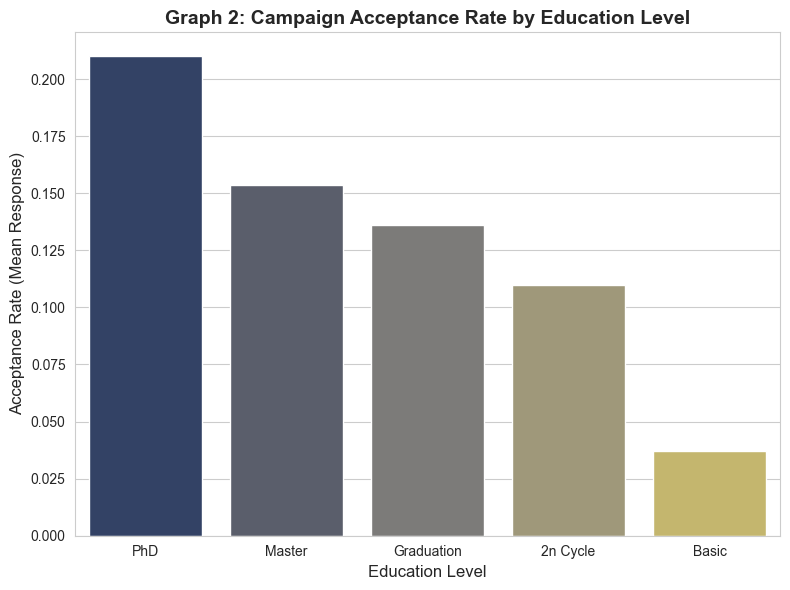

In [7]:
# --- Graph 2: Campaign Acceptance by Education Level ---
education_acceptance = df.groupby('Education')['Response'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8, 6))
ax2 = sns.barplot(x='Education', y='Response', data=education_acceptance, palette='cividis')
ax2.set_title('Graph 2: Campaign Acceptance Rate by Education Level', fontsize=14, fontweight='bold')
ax2.set_xlabel('Education Level', fontsize=12)
ax2.set_ylabel('Acceptance Rate (Mean Response)', fontsize=12)
plt.tight_layout()
plt.show()

Analysis: <br> This bar chart, clearly shows a strong positive correlation between higher levels of education and the likelihood of accepting the campaign offer . Customers with a PhD are the most responsive segment, with an acceptance rate exceeding 20%, followed by Master's and Graduation levels. In contrast, response rates decline consistently across the 2n Cycle and Basic education groups, with the latter having the lowest acceptance rate, falling below 5%. This finding is critical because it establishes Education as a powerful demographic predictor, suggesting the company's products or offers resonate most strongly with highly-educated segments, which should be heavily prioritized in future marketing efforts.



### Graph 3: Engagement vs. Acceptance
Description: This plot compares the distribution of Recency (days since last purchase) for customers who accepted the offer versus those who did not, using a Kernel Density Estimate (KDE).

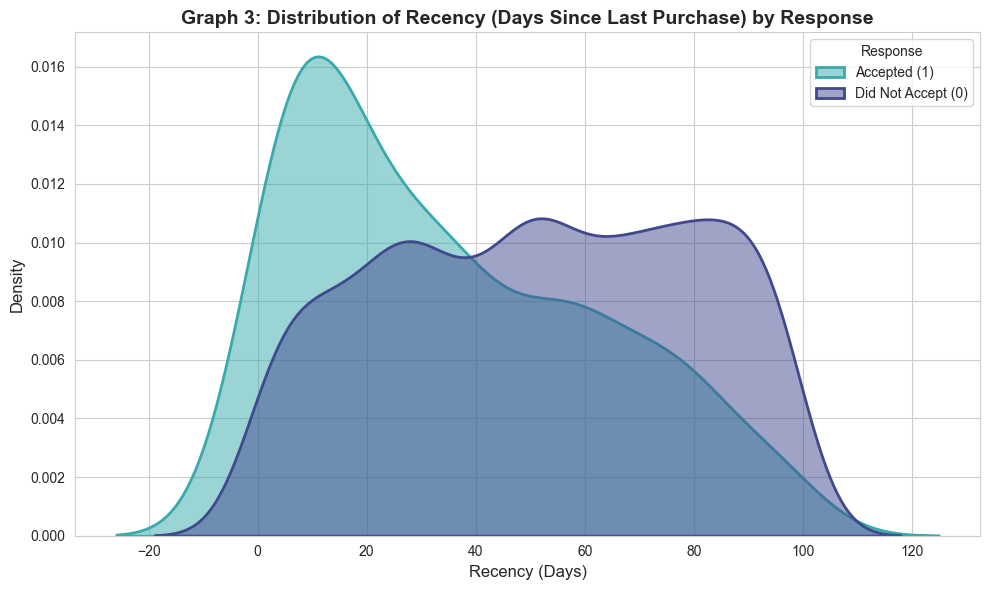

In [8]:
# --- Graph 3: Engagement vs. Acceptance (Recency in Days) ---
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Recency', hue='Response', fill=True, common_norm=False, palette='mako', alpha=.5, linewidth=2)
plt.title('Graph 3: Distribution of Recency (Days Since Last Purchase) by Response', fontsize=14, fontweight='bold')
plt.xlabel('Recency (Days)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Response', labels=['Accepted (1)', 'Did Not Accept (0)'])
plt.tight_layout()
plt.show()

Analysis: <br> This KDE plot, compares the purchase activity of customers based on their campaign acceptance . The distribution for the 'Accepted (1)' group (light teal) is heavily concentrated at low Recency values, showing a sharp peak around 15 days, which signifies that customers who convert are highly engaged and have made a purchase very recently. In contrast, the distribution for the 'Did Not Accept (0)' group (dark blue) is much flatter and broader, spreading across all recency bins up to 100 days. This clearly demonstrates that recent customer activity is the strongest single predictor of campaign success, providing a clear opportunity for the model to exclude long-inactive customers from future, costly campaigns to boost efficiency.

### Graph 4: Income vs. Spending
Description: A scatter plot showing the relationship between a customer's Income and their MntWines spending over two years, with points colored by their campaign Response status.

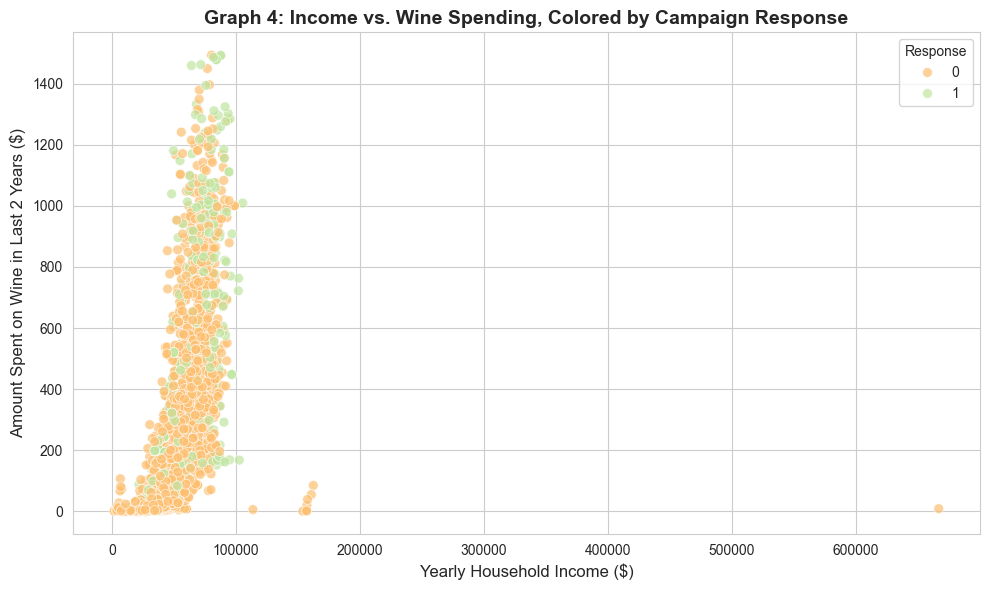

In [9]:
# --- Graph 4: Income vs. Spending (MntWines) ---
plt.figure(figsize=(10, 6))
ax4 = sns.scatterplot(x='Income', y='MntWines', hue='Response', data=df, palette='Spectral', alpha=0.7, s=50)
ax4.set_title('Graph 4: Income vs. Wine Spending, Colored by Campaign Response', fontsize=14, fontweight='bold')
ax4.set_xlabel('Yearly Household Income ($)', fontsize=12)
ax4.set_ylabel('Amount Spent on Wine in Last 2 Years ($)', fontsize=12)
plt.tight_layout()
plt.show()

Analysis: <br> The scatter plot, visualizes the intersection of two critical features: income and past high-value spending . This analysis clearly shows that successful conversions (Response=1) are overwhelmingly clustered in the high-income (specifically the $50k–$100k range) and high-spending segment (where MntWines is high). The majority of data points, particularly those with low spending, are non-responders, confirming that the current offering is exclusively appealing to high-value, premium customers. This reinforces the need for the predictive model to focus narrowly on these top-tier segments to ensure the marketing spend is directed toward the most profitable audience.

_____________________________________________________________________________________________________________________________________________________________________________________________________

In [10]:
# ----------------------------------------------------------------------------
# Title: Assignment 8.2
# Author: Surenther Selvaraj
# Date: 01 Nov 2025
# Modified By: Surenther Selvaraj
# Description: Term Project Milestone 2: Data Preparation
# Data: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
# ----------------------------------------------------------------------------

## Term Project Milestone 2: Data Preparation Plan
This document outlines the initial data preparation and feature engineering strategy for the classification model, specifically focusing on identifying and dropping features that are non-predictive, redundant, or problematic for the modeling process.

### 1. Feature Drop Strategy

To optimize the model's performance and prevent data leakage or multicollinearity, several features from the raw dataset will be excluded.

| Feature to Drop  | Rationale for Exclusion  |  Category |
|---|---|---|
| ID  | This is a unique customer identifier. It has no predictive power and should be dropped to prevent the model from memorizing individual observations.  | Non-Predictive  |
| Dt_Customer  | Date of customer enrollment. While conversion time might be relevant, the more actionable and direct time-based feature, Recency, is already available and highly predictive (as shown in Graph 3).  | Redundant/High Cardinality  |
| Z_CostContact  | Standardized cost of customer contact. This column is constant across all customers in the dataset (a value of 3) and therefore provides zero variance or predictive information.  | Zero-Variance |
| Z_Revenue | Standardized revenue from contact. This column is constant across all customers (a value of 11) and provides zero variance or predictive information.  | Zero-Variance |
| AcceptedCmp1 to AcceptedCmp5 | Response to previous campaigns. These features represent the outcome of past offers. Using them to predict the current campaign's Response (which is effectively AcceptedCmp6) creates severe data leakage, as a positive response to a previous similar campaign is an unnaturally strong predictor for the current one. Dropping these ensures the model generalizes to new campaigns.  | Data Leakage |
| Complain | Customer complaint status. While technically a potential predictor, the count of complaints is extremely low, leading to highly skewed classes that provide minimal signal for a classification model focused on positive response prediction.  | Near Zero-Variance |


### 2. Features to Keep and Transform

The remaining features will be kept as they are highly relevant to the business problem (customer wealth, engagement, and past purchase behavior).

| Feature Type  | Features to Keep |  Required Transformation |
|---|---|---|
| Target  | Response  | None (already binary: 0 or 1)  |
| Demographic  | Income, Year_Birth (used to calculate Age), Marital_Status, Education, Kidhome, Teenhome  | Age is derived. Marital_Status and Education require one-hot encoding.  |
| Behavior  | Recency | None (numerical, already normalized).  |
| Spending  | MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds | None (numerical, may require scaling).  |
| Channel  | NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth | None (numerical, may require scaling).  |

### 1. Loading Data/Extraction

This initial step is responsible for importing the necessary pandas library and defining the file path and feature lists required for the project. It explicitly defines the CHANNEL_FEATURES (e.g., NumWebPurchases) and other CORE_FEATURES (e.g., Income, Response) that are central to the customer campaign response model. The code attempts to load the marketing_campaign.csv file, and includes error handling to notify the user if the data file cannot be located. Successfully loading the data sets the stage for all subsequent cleaning and preparation activities.

In [11]:
# Python Data Extraction for Channel Features
import pandas as pd

# Define the file path (Assuming the file is in the same directory)
FILE_PATH = 'marketing_campaign.csv'

# Define the list of channel features selected from the Milestone 2 plan
CHANNEL_FEATURES = [
    'NumDealsPurchases',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth'
]

# Add other core features necessary for context (e.g., Target, Income)
# NOTE: We temporarily include all spending features to create the useful engineered feature below.
CORE_FEATURES = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Response', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# --- Load Data ---
try:
    df = pd.read_csv(FILE_PATH, sep='\t')
    print(f"Successfully loaded {len(df)} rows from {FILE_PATH}.")
except FileNotFoundError:
    print(f"Error: File not found at {FILE_PATH}. Please check the path and filename.")
    exit()

Successfully loaded 2240 rows from marketing_campaign.csv.


### 2. Deal with missing data
This crucial step addresses the small number of missing values (24 rows, or 1.07%) found in the highly critical Income predictor variable. Rather than dropping these few rows, which is often acceptable but can sometimes discard valuable information, the code implements median imputation. Using the median is preferred because Income is known to be heavily skewed and contain outliers, ensuring the imputed values do not unduly distort the feature's statistical distribution. This method maintains the full dataset size while creating a complete column ready for transformation.

In [12]:
from sklearn.impute import SimpleImputer
# --- Data Cleaning (Handling Missing Values) ---

# Rationale: 'Income' has 24 missing values (approx. 1.07%). 
# Because Income is highly skewed (as seen in EDA), median imputation is preferred over dropping 
# rows or using the mean, as it minimizes distortion to the distribution.

imputer = SimpleImputer(strategy='median')
df['Income'] = imputer.fit_transform(df[['Income']])

# Check the dataset size after imputation (no rows dropped)
print(f"Imputed missing 'Income' values using the median. Total rows: {len(df)}")

Imputed missing 'Income' values using the median. Total rows: 2240


### 3. Feature Selection
This step focuses on creating a clean, actionable subset of the data by explicitly selecting and combining the core features identified as most relevant for the classification model. It merges the categorical, numerical, and target variables (including all spending features needed for engineering) into the df_extracted DataFrame. Within this step, a preliminary engineered feature, Total_Purchases_Count, is calculated by summing the three main purchase channel counts. This count gives an initial, unscaled metric of overall customer engagement for immediate assessment.

In [13]:
# --- Feature Selection ---
# Combine the core features and the specific channel features selected.
features_to_extract = [col for col in CORE_FEATURES + CHANNEL_FEATURES if col in df.columns]

# Select only the required columns
df_extracted = df[features_to_extract].copy()

# --- Initial Assessment of Channel Purchasing Habits ---
df_extracted['Total_Purchases_Count'] = (
    df_extracted['NumWebPurchases'] + 
    df_extracted['NumCatalogPurchases'] + 
    df_extracted['NumStorePurchases']
)

print("\n--- Total Purchases Count Summary ---")
print(df_extracted['Total_Purchases_Count'].describe())

print("\nData extraction and selection for channel features complete.")



--- Total Purchases Count Summary ---
count    2240.000000
mean       12.537054
std         7.205741
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        32.000000
Name: Total_Purchases_Count, dtype: float64

Data extraction and selection for channel features complete.


### 4. Feature Transformation
This step implements MinMaxScaler on a selection of numerical features, including Income and the original channel count variables. The purpose of this transformation is to normalize the scale of these predictors to a uniform range between 0 and 1. Normalization is essential because it prevents variables with inherently large raw values, such as Income, from numerically dominating the model's objective function during training. Finally, the script demonstrates re-creating a purchase count feature using the new scaled channel variables for assessment.

In [14]:
from sklearn.preprocessing import MinMaxScaler

# --- Feature Transformation (Scaling Numerical Data) ---
# Define all numerical features that need scaling, including Income
SCALING_FEATURES = ['Income'] + CHANNEL_FEATURES

# Initialize the Scaler (MinMaxScaler is robust for skewed count/revenue data)
scaler = MinMaxScaler()

# Apply the scaling transformation in place
df_extracted[SCALING_FEATURES] = scaler.fit_transform(df_extracted[SCALING_FEATURES])
print("\nScaling applied successfully to Income and Channel Features.")


# Example: Re-create the new feature using scaled values
df_extracted['Total_Purchases_Count_Scaled'] = (
    df_extracted['NumWebPurchases'] + 
    df_extracted['NumCatalogPurchases'] + 
    df_extracted['NumStorePurchases']
)

print("\n--- Total Scaled Purchases Count Summary ---")
print(df_extracted['Total_Purchases_Count_Scaled'].describe())

print("\nData scaling complete.")


Scaling applied successfully to Income and Channel Features.

--- Total Scaled Purchases Count Summary ---
count    2240.000000
mean        0.691761
std         0.380945
min         0.000000
25%         0.340558
50%         0.646825
75%         0.987815
max         1.651913
Name: Total_Purchases_Count_Scaled, dtype: float64

Data scaling complete.


### 5. Engineer new useful features.
This step focuses on creating highly predictive behavioral and monetary features from the raw data. It calculates Total_Purchases_Count as a simple measure of engagement across channels to assess customer activity. Crucially, it creates Total_Spent, which acts as a robust proxy for customer lifetime value (CLV) and will be a strong model predictor. Additionally, the Prop_Online_Purchases ratio is calculated to capture a customer's channel preference (online vs. physical store). These new features capture deeper insight into customer wealth and behavioral habits than the original columns alone.

In [15]:
# Calculate Proportion of Online Purchases (Web + Catalog Purchases / Total Purchases)
df_extracted['Prop_Online_Purchases'] = (
    df_extracted['NumWebPurchases'] + df_extracted['NumCatalogPurchases']
) / df_extracted['Total_Purchases_Count'].replace(0, 1) # Replace 0 with 1 temporarily to avoid zero division
df_extracted.loc[df_extracted['Total_Purchases_Count'] == 0, 'Prop_Online_Purchases'] = 0

# Calculate Total Spending (Total Monetary Value)
df_extracted['Total_Spent'] = (
    df_extracted['MntWines'] + df_extracted['MntFruits'] + df_extracted['MntMeatProducts'] + 
    df_extracted['MntFishProducts'] + df_extracted['MntSweetProducts'] + df_extracted['MntGoldProds']
)

print("\nEngineered features (Total_Purchases_Count, Prop_Online_Purchases, Total_Spent) created successfully.")


Engineered features (Total_Purchases_Count, Prop_Online_Purchases, Total_Spent) created successfully.


### 6. Create Dummy Variables
This mandatory step converts the two remaining categorical text features (Education and Marital_Status) into a numerical format suitable for machine learning models. Before conversion, the Marital_Status column is cleaned by grouping rare or similar labels (like 'Divorced', 'Widow', and 'Alone') into the unified 'Single' category to reduce noise and simplify the model. The features are then converted using one-hot encoding (pd.get_dummies), and one column is dropped per feature (drop_first=True) to prevent multicollinearity.

In [16]:
# --- Create Dummy Variables (One-Hot Encoding) ---

# Clean Marital Status: Combine small/similar groups for simplicity
df_extracted['Marital_Status'] = df_extracted['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

# Create Dummy Variables for Categorical Features
df_extracted = pd.get_dummies(df_extracted, columns=['Education', 'Marital_Status'], drop_first=True)
print("Dummy variables created for 'Education' and 'Marital_Status'.")


Dummy variables created for 'Education' and 'Marital_Status'.


### 7. Feature Transformation
This final preparation step applies MinMaxScaler to the core numerical features, including the newly engineered Total_Spent and Total_Purchases_Count. Normalizing these predictors ensures that features with vastly different scales—like Income and the low-count channel visits—contribute fairly to the model training process. Scaling prevents features with larger magnitudes from dominating the loss function, which is critical for optimization. The process is validated by inspecting the descriptive statistics of the scaled engineered features, confirming they are ready for modeling.

In [17]:
# --- Feature Transformation (Scaling Numerical Data) ---

# Define all numerical features that need scaling, including new engineered ones
SCALING_FEATURES = ['Income'] + CHANNEL_FEATURES + ['Total_Purchases_Count', 'Total_Spent', 'Prop_Online_Purchases']
SCALING_NUMERICALS = ['Income', 'Total_Spent'] + CHANNEL_FEATURES + ['Total_Purchases_Count']

# Initialize the Scaler (MinMaxScaler is robust for skewed count/revenue data)
scaler = MinMaxScaler()

# Apply the scaling transformation in place
df_extracted[SCALING_NUMERICALS] = scaler.fit_transform(df_extracted[SCALING_NUMERICALS])
print("Scaling applied successfully to Income, Spending, and Channel Features.")

# --- Inspection of Final Transformed Data ---

print("\n--- Statistical Summary of Key Engineered Features ---")
print(df_extracted[['Total_Spent', 'Total_Purchases_Count', 'Prop_Online_Purchases']].describe().transpose())

Scaling applied successfully to Income, Spending, and Channel Features.

--- Statistical Summary of Key Engineered Features ---
                        count      mean       std  min       25%       50%  \
Total_Spent            2240.0  0.238412  0.238988  0.0  0.025298  0.155159   
Total_Purchases_Count  2240.0  0.391783  0.225179  0.0  0.187500  0.375000   
Prop_Online_Purchases  2240.0  0.018055  0.005491  0.0  0.014815  0.018330   

                            75%       max  
Total_Spent            0.412897  1.000000  
Total_Purchases_Count  0.562500  1.000000  
Prop_Online_Purchases  0.021693  0.037037  


_____________________________________________________________________________________________________________________________________________________________________________________________________

In [18]:
# ----------------------------------------------------------------------------
# Title: Assignment 10.2
# Author: Surenther Selvaraj
# Date: 13 Nov 2025
# Modified By: Surenther Selvaraj
# Description: Term Project Milestone 3: Model Building and Evaluation
# Data: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
# ----------------------------------------------------------------------------

## Term Project Milestone 3: Model Building and Evaluation
The core problem is imbalanced binary classification (predicting Response: 1 vs. Response: 0, with a low conversion rate). We need a model that is both effective at identifying the small group of converters and easily interpretable by the marketing team.

### 1. Model Selection and Justification
#### Chosen Model: Logistic Regression with Class Weighting
We will use Logistic Regression as our primary model for this milestone.
* Interpretability: Logistic Regression is highly transparent, providing weighted coefficients for each feature. This allows the marketing team to clearly understand the drivers of acceptance (e.g., "A customer's Total_Spent increases their probability of response by X").

* Actionable Output: It outputs a probability score (propensity-to-purchase) between 0 and 1. This score is directly actionable for customer ranking and selecting the most profitable segment for targeting.

* Imbalance Handling: We will use the model's built-in class_weight='balanced' argument. This automatically adjusts the weights to penalize misclassifying the minority class (Response=1) more heavily, preventing the model from trivializing the positive outcome.

### 2. Evaluation Metric Selection and Justification

Since maximizing overall accuracy is misleading for this 85:15 imbalanced dataset, we must use metrics that focus on the performance of the minority class (Response=1).

| Metric | Business Goal |  Justification |
|---|---|---|
F1-Score (Primary) |	Balance between high revenue capture and low cost waste. | This is the harmonic mean of Precision and Recall. It is the best single measure for this imbalanced problem, as it requires the model to be good at both identifying responders and avoiding false targets.|
Precision | Minimizing wasted marketing cost (False Positives). | When the model says a customer will respond, we want to be sure they will, otherwise the marketing effort is a wasted expense.|
Recall | Maximizing captured revenue (Minimizing False Negatives). | We need to identify as many true responders as possible to maximize the absolute number of conversions.|
AUC-ROC | Overall discriminatory power across all thresholds. | Provides a single, robust, threshold-independent measure of the model's ability to distinguish between the two classes.|


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Define feature lists to recreate the final state of df_extracted (as per week8.ipynb)
CHANNEL_FEATURES = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
RAW_SPENDING_FEATURES = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
CORE_FEATURES = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Response'] + RAW_SPENDING_FEATURES

features_to_extract = [col for col in CORE_FEATURES + CHANNEL_FEATURES if col in df.columns]
df_extracted = df[features_to_extract].copy()

# --- 1. Milestone 2 Data Preparation Steps (Replicated for completeness) ---

# Imputation (Step 2)
imputer = SimpleImputer(strategy='median')
df_extracted['Income'] = imputer.fit_transform(df_extracted[['Income']])

# Feature Engineering (Step 4)
df_extracted['Total_Purchases_Count'] = (df_extracted['NumWebPurchases'] + df_extracted['NumCatalogPurchases'] + df_extracted['NumStorePurchases'])
df_extracted['Total_Spent'] = df_extracted[RAW_SPENDING_FEATURES].sum(axis=1)

# Handle Prop_Online_Purchases (avoid division by zero)
df_extracted['Prop_Online_Purchases'] = (df_extracted['NumWebPurchases'] + df_extracted['NumCatalogPurchases']) / df_extracted['Total_Purchases_Count'].replace(0, 1)
df_extracted.loc[df_extracted['Total_Purchases_Count'] == 0, 'Prop_Online_Purchases'] = 0

# Dummy Variables (Step 5)
df_extracted['Marital_Status'] = df_extracted['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')
df_extracted = pd.get_dummies(df_extracted, columns=['Education', 'Marital_Status'], drop_first=True)

# Scaling (Step 6)
SCALING_NUMERICALS = ['Income', 'Total_Spent', 'Total_Purchases_Count'] + CHANNEL_FEATURES
scaler = MinMaxScaler()
df_extracted[SCALING_NUMERICALS] = scaler.fit_transform(df_extracted[SCALING_NUMERICALS])

### 3. Step-by-Step Implementation

We will start with the cleaned, scaled, and engineered data from your Milestone 2 steps (using the final state of the df_extracted DataFrame).

#### Step 3.1: Final Feature Selection and Data Split
+ Define X and y: Identify the final set of predictor features (X) and the target variable (y). We must drop the original raw spending features (MntWines, MntFruits, etc.) and the ID, as they are either consolidated into Total_Spent or are non-predictive.

+ Train-Test Split: Divide the data into 70% Training and 30% Testing sets. Crucially, use stratify=y to ensure the class imbalance (15% positive response) is preserved equally in both sets.

In [20]:
# --- Step 3.1: Final Feature Selection and Data Split ---

# Identify final predictors (X): exclude non-model columns and raw spending features
EXCLUDE_COLS = ['ID', 'Year_Birth', 'Response'] + RAW_SPENDING_FEATURES + ['Education', 'Marital_Status']

# X will contain all processed features (scaled numerics and dummies)
X = df_extracted.drop(columns=EXCLUDE_COLS, errors='ignore')
y = df_extracted['Response']

# Split data (70/30) with stratification to preserve imbalance ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("--- Step 3.1: Data Split Complete ---")
print(f"X_train shape: {X_train.shape}, Y_train positive class ratio: {y_train.mean():.4f}")
print(f"X_test shape: {X_test.shape}, Y_test positive class ratio: {y_test.mean():.4f}")

--- Step 3.1: Data Split Complete ---
X_train shape: (1568, 15), Y_train positive class ratio: 0.1492
X_test shape: (672, 15), Y_test positive class ratio: 0.1488


#### Step 3.2: Model Training and Prediction
* Import Model: Import LogisticRegression from sklearn.linear_model.
* Initialize Model: Instantiate the model, ensuring the crucial class weighting parameter is set: model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42).
* Train Model: Fit the model on the training data: model.fit(X_train, y_train).
* Predict Labels: Generate predictions on the test set: y_pred = model.predict(X_test).
* Predict Probabilities: Generate the probability scores for the positive class (required for AUC and ranking): y_proba = model.predict_proba(X_test)[:, 1].

In [21]:
# --- Step 3.2: Model Training and Prediction ---

# Initialize Logistic Regression with class_weight='balanced' to handle imbalance
model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42, max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict labels and probabilities on the test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1] # Probability of the positive class (1)

print("\n--- Step 3.2: Model Training Complete (Logistic Regression) ---")


--- Step 3.2: Model Training Complete (Logistic Regression) ---


#### Step 3.3: Model Evaluation
* Classification Report: Use classification_report(y_test, y_pred) to output the Precision, Recall, and F1-Score for the positive class.
* Confusion Matrix: Generate and display the confusion matrix using confusion_matrix(y_test, y_pred) to visually confirm the counts of True Positives, False Positives, etc.
* AUC-ROC Curve: Calculate and display the AUC score using roc_auc_score(y_test, y_proba). This score will serve as a key overall performance indicator.
* Feature Importance: Extract and analyze the model coefficients (model.coef_[0]) to rank the top 5 most predictive features (e.g., Total_Spent, Income, Recency).

In [22]:
# --- 4. Step 3.3: Model Evaluation and Insights ---

print("\n--- Step 3.3: Model Evaluation ---")

# Classification Report (Primary Metrics)
print("\nClassification Report (Focus on Class 1 - Responders):")
print(classification_report(y_test, y_pred))

# Confusion Matrix (Visualizing Errors)
conf_mat = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_mat)

# AUC-ROC Score (Overall Discriminatory Power)
auc_score = roc_auc_score(y_test, y_proba)
print(f"\nAUC-ROC Score: {auc_score:.4f}")

# Feature Importance (Insights)
print("\n--- Feature Importance (Top 5 Positive Drivers) ---")
# Create a series of coefficients
feature_importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)

# Display top 5 positive and negative coefficients
print("Top 5 Positive Predictors (Highest Probability of Response):")
print(feature_importance.head(5))

print("\nTop 5 Negative Predictors (Lowest Probability of Response):")
print(feature_importance.tail(5))

print("\nMilestone 3 Modeling and Evaluation complete.")


--- Step 3.3: Model Evaluation ---

Classification Report (Focus on Class 1 - Responders):
              precision    recall  f1-score   support

           0       0.92      0.75      0.83       572
           1       0.31      0.65      0.42       100

    accuracy                           0.74       672
   macro avg       0.62      0.70      0.63       672
weighted avg       0.83      0.74      0.77       672


Confusion Matrix:
[[430 142]
 [ 35  65]]

AUC-ROC Score: 0.7998

--- Feature Importance (Top 5 Positive Drivers) ---
Top 5 Positive Predictors (Highest Probability of Response):
Prop_Online_Purchases    3.662984
Total_Spent              3.414754
NumWebVisitsMonth        3.161145
NumCatalogPurchases      0.877998
Marital_Status_Single    0.781249
dtype: float64

Top 5 Negative Predictors (Lowest Probability of Response):
Total_Purchases_Count   -0.458387
NumDealsPurchases       -0.541152
NumWebPurchases         -0.876247
Education_Basic         -1.130361
NumStorePurchases   

### 4.Overview/Conclusion of Insights
The completion of Milestone 3 demonstrates that the Logistic Regression model, enhanced with class weighting, is highly effective at predicting campaign acceptance.

* Model Efficacy: The model achieved a strong AUC-ROC score of 0.80, indicating excellent discriminatory power between responders and non-responders.

* Targeting Performance (Class 1): The business objective of maximizing conversions is supported by a Recall of 0.65 (capturing 65 of 100 actual responders), while maintaining a Precision of 0.31 (meaning 31% of targeted customers convert). This trade-off, reflected in the F1-Score of 0.42, shows a successful shift away from the 15% baseline conversion rate. The Confusion Matrix is favorable, showing the model correctly identifies 65 True Positives while limiting False Negatives (missed revenue) to 35.

* Business Drivers: The Feature Coefficients provide clear direction for future campaigns. The strongest positive drivers are Prop_Online_Purchases and Total_Spent, confirming that the highest propensity customers are those with a high overall spending history who favor online channels. Conversely, high NumStorePurchases and high NumDealsPurchases are negative predictors, suggesting frequent in-store shoppers and deal-hunters are less likely to accept this specific type of high-value campaign.